<a href="https://colab.research.google.com/github/Dedge12345/Dedge12345/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You work as an analyst in the marketing department of a company that provides various medical insurance in Nigeria. Your manager is unhappy with the low sales volume of a specific kind of insurance. The data engineer provides you with a sample dataset for those that visit the company website for medical insurance.
The dataset contains the following columns:
- User ID
- Gender
- Age
- Salary
- Purchase: An indicator of whether the users purchased (1/Positive Class) or not-purchased (0/Negative Class) a particular product.
As we must have guessed, this is a binary classification problem, with the positive class being "Purchased" and the negative class being "Not purchased".


In [1]:
# For running pandas_profiling
# pip install pandas==0.25.3
# pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
url = 'https://drive.google.com/file/d/1DmJA2zbp_GRhiXO8JWI0j1x30KN9WPdz/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
insurance = pd.read_csv(url)
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [11]:
#Dropping User ID column 
insurance.drop( ["User ID"], axis= "columns", inplace= True)



KeyError: ignored

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
...,...,...,...,...
395,Female,46,41000,purchased
396,Male,51,23000,purchased
397,Female,50,20000,purchased
398,Male,36,33000,not-purchased


In [ ]:
#Mapping the values 1 and 0 to transform the target column
insurance["Purchased"] = insurance[ "Purchased"].apply(lambda x:1 if x == "purchased" else 0)

#Reading the data again
insurance.head (10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
ProfileReport(insurance)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,4
Number of observations,400
Total Missing (%),0.0%
Total size in memory,12.6 KiB
Average record size in memory,32.3 B
Numeric,2
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


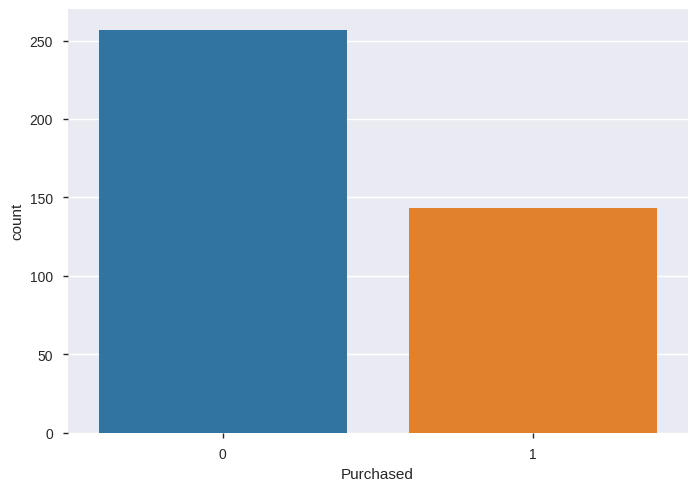

In [ ]:
sns.countplot(x = "Purchased", data = insurance)

As you can see, the majority of those that visit the medical insurance company did not want to buy the insurance. This is an example of class imbalance. That is, there is no equal proportion of those that will buy or not.

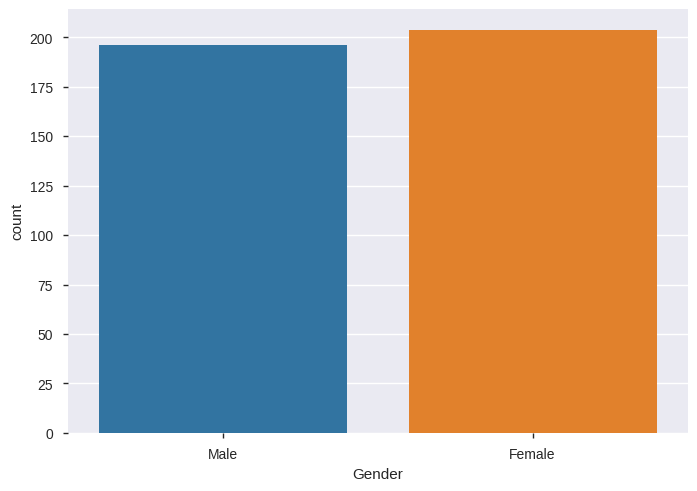

In [ ]:
sns.countplot(x = "Gender", data = insurance)

The proportion of males are almost the same as females

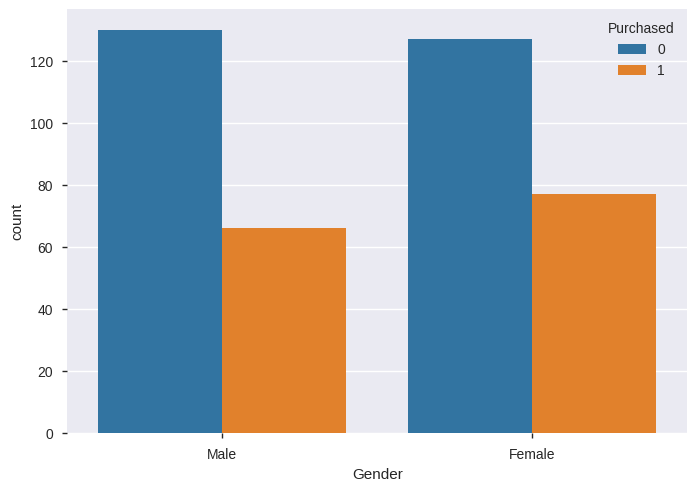

In [ ]:
sns.countplot(x = "Gender", hue = "Purchased", data = insurance)

It seems that females wanted to purchase the insurance when compared with males.

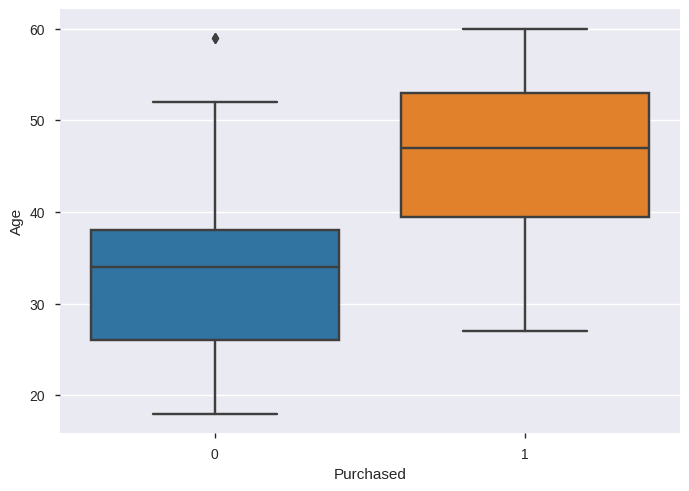

In [ ]:
sns.boxplot(x = 'Purchased', y = 'Age', data = insurance)

From the look of things, older people purchased insurance compared with younger people.

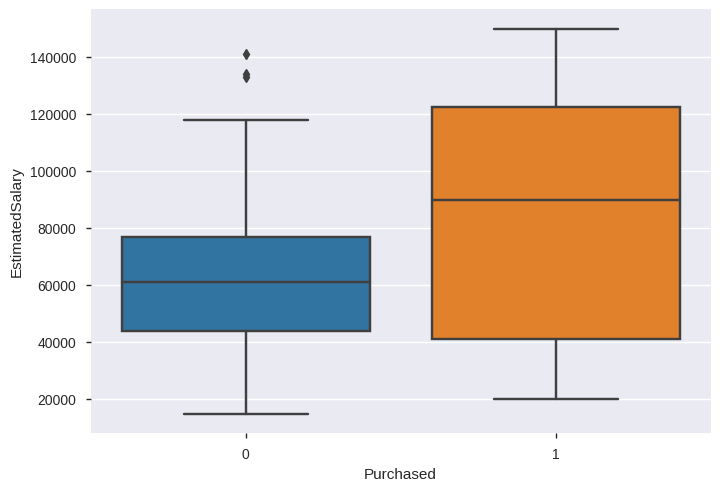

In [ ]:
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = insurance)

People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. Of course, it is expected you purchase a medical insurance when you have money.

# Model building

In [ ]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

Preparing the Data for modeling(Separating features and the label from the data)
Now is the time to build machine learning models for the task of predicting whether the customers will buy medical insurance or not. Therefore, we shall separate the set of features (X) from the label (Y).

In [ ]:
X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data
y = insurance["Purchased"]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

As discussed previously, we need to create a one-hot encoding for all the categorical features in the data because some algorithms cannot work with categorical data directly. They require all input variables and output variables to be numeric. In this case, we will create a one-hot encoding for the gender feature by using pd.get_dummies(). As shown below:

In [ ]:
pd.get_dummies(insurance[ "Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Gender_Female      400 non-null uint8
Gender_Male        400 non-null uint8
dtypes: int64(2), uint8(2)
memory usage: 7.2 KB


Split the data into training and test set


As discussed in A, We will split our dataset (Features (X) and Label (Y)) into training and test data by using train_test_split() function from the sklearn. The training set will be 80% while the test set will be 20%. The random_state that is set to 1234 is for all of us to have the same set of data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_prediction = logisticmodel.predict(X_test)

Model evaluation:

Since we know the true label in the test set (i.e. y_test), we can compare this prediction with it, hence evaluate the logistic model. I have created a function that will help you visualize a confusion matrix for the logistic model and you can call on it henceforth to check the performance of any model.

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

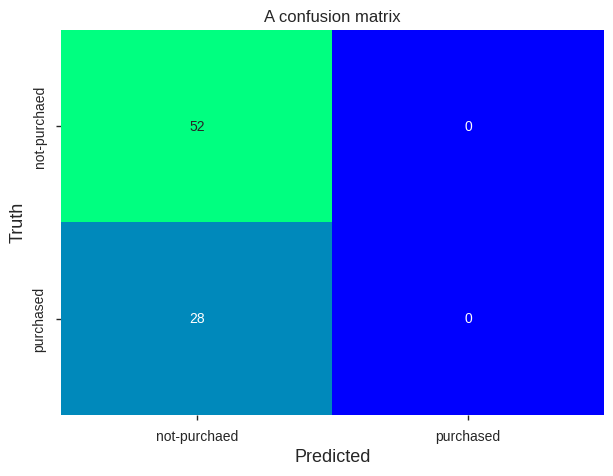

In [ ]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

Interpretation of the Logistics Regression model evaluation performance


There are 52 True Negatives (TN): predicting that the customer will not buy the insurance and truly the customer did not buy the insurance.
There are 28 False Negative (FN): predicting that the customer will not buy the insurance and the customer actually bought the insurance.
We can check the accuracy by using:

In [ ]:
metrics.accuracy_score(y_test, logistic_prediction)

0.65

In [ ]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There are four ways to check if the predictions are right or wrong:

* TN / True Negative: the case was negative and predicted negative
* TP / True Positive: the case was positive and predicted positive
* FN / False Negative: the case was positive but predicted negative
* FP / False Positive: the case was negative but predicted positive

### Precision — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

### Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

### F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

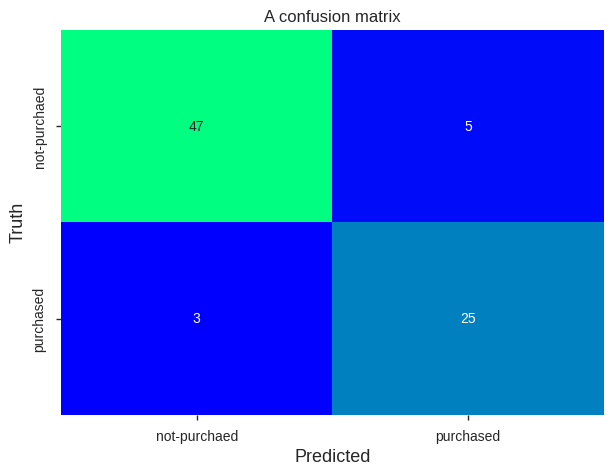

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.9

In [ ]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80

